# Insper - Modelagem e Simulação do Mundo Físico

## Projeto 3 - Newton's Candle

### Inicialização
Está é a etapa inicial do projeto, na qual estarão localizados todos as bibliotecas utilizadas no trabalho.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

### Implementação do Modelo

Nesta etapa se encontram-se 6 cláusulas de código, que formaram os parâmetros do Modelo, Modelo, Lista de tempo, condições iniciais, ODEINT e Plotagem do gráfico.

*Parâmetros do Modelo*


In [9]:
l = 1.2 #compr. do fio em metros
g = 9.8 #gravidade em m/s²
m = 128e-3 # massa da bolihna em kg
d = 1e-1 #dist. entre os centros das bolinhas móveis, na parte mais baixa, dada em metros
K = 0.6 #percentual que se mantém da energia a cada impacto


*Modelo*

In [10]:
def modelo(lista,t):
    x = lista[0]
    y = lista[1]
    vx = lista[2]
    vy = lista[3]
    v = sqrt( vx**2 + vy**2 )
    cosseno = (l - y)/l
    seno = - x/l
    T = m * g * cosseno + m * v**2/l
    dxdt = vx
    dydt = vy
    dvxdt = T / m * seno
    dvydt = - g + T / m * cosseno
    
    if y < 1e-4 and dydt < 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0
    
    return [ dxdt , dydt , dvxdt , dvydt ]

*Lista de Tempo*

In [11]:
#Condições Iniciais
x = -1.291
y = 0.475
escala = 1

CI = [ escala*x , escala*y , 0 , 0 ]


tf = 2
dt = 1e-2
lista_t = np.arange( 0 , tf , dt )

*ODEINT* aqui ele só executa uma vez, sem perda de energia

C:\Users\arthu\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


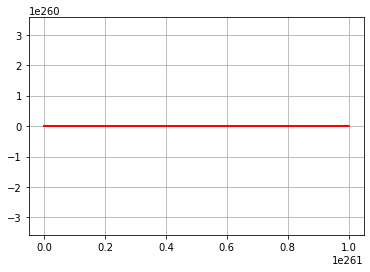

In [12]:
solucao = odeint( modelo , CI , lista_t, mxordn = 1 )

lista_x = solucao[:,0]
lista_y = solucao[:,1]
lista_vx = solucao[:,2]

plt.plot( lista_x , lista_y, 'r')

CI = [ 0 , 0 , K * lista_vx[-1] , 0 ]

solucao = odeint( modelo , CI , lista_t, mxordn = 1 )

lista_x = solucao[ : , 0 ] + d  # D FOI SOMADO PARA REPRESENTAR A POSIÇÃO DA BOLINHA DA DIREITA
lista_y = solucao[ : , 1 ]
lista_vx = solucao[ : , 2 ]

plt.plot( lista_x , lista_y, 'b')

plt.axis("equal")
plt.grid(True)
plt.show() 
        
        

*Plotando Gráficos*

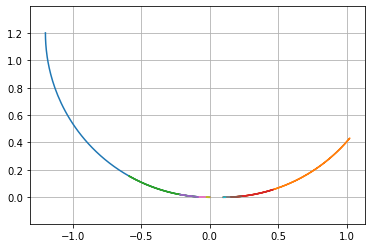

In [13]:
CI = [ - l , l , 0 , 0 ]

tf = 2
dt = 1e-2
lista_t = np.arange(0,tf,dt)

# vamos criar um vetor para add as posições de x e y
x = []
y = []

for i in range(10):

    if i%2 == 0 :

        solucao = odeint( modelo , CI , lista_t, mxordn = 1 )

        lista_x = solucao[:,0]
        x.append(lista_x)
        lista_y = solucao[:,1]
        y.append(lista_y)
        lista_vx = solucao[:,2]

        plt.plot(lista_x,lista_y)

        CI = [0,0,K*lista_vx[-1],0]
        
    else:
    
        solucao = odeint( modelo , CI , lista_t, mxordn = 1 )

        lista_x = solucao[:,0] + d
        x.append(lista_x)
        lista_y = solucao[:,1]
        y.append(lista_y)
        lista_vx = solucao[:,2]

        plt.plot(lista_x , lista_y)

        CI = [0,0,K*lista_vx[-1],0]

plt.axis("equal")
plt.grid(True)
plt.show()

parte da validação, usando os dados do traker

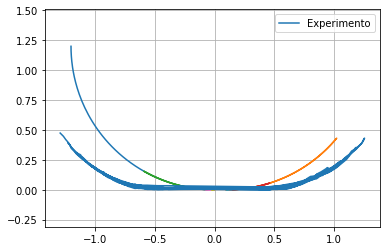

In [14]:
# Implemente seu código do item 5 abaixo

import pandas

colunas = ["t","x","y","vx","vy"]
data = pandas.read_csv("dados_metricos.csv",names = colunas)

te = data.t.tolist()
xe = data.x.tolist()
ye = data.y.tolist()
vxe = data.vx.tolist()
vye = data.vy.tolist()

CI = [ - l , l , 0 , 0 ]

tf = 2
dt = 1e-2
lista_t = np.arange(0,tf,dt)

for i in range(10):

    if i%2 == 0 :

        solucao = odeint( modelo , CI , lista_t, mxordn = 1 )

        lista_x = solucao[:,0]
        lista_y = solucao[:,1]
        lista_vx = solucao[:,2]

        plt.plot(lista_x,lista_y)

        CI = [0,0,K*lista_vx[-1],0]
        
    else:
    
        solucao = odeint( modelo , CI , lista_t, mxordn = 1 )

        lista_x = solucao[:,0] + d
        lista_y = solucao[:,1]
        lista_vx = solucao[:,2]

        plt.plot(lista_x , lista_y)

        CI = [0,0,K*lista_vx[-1],0]

plt.plot(xe,ye,label = "Experimento")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()